In [3]:
import os
import pickle
from copy import deepcopy
from typing import List, Optional, Tuple

import h5py as h5
import matplotlib.pyplot as plt
import numpy as np
import torch
from openretina.constants import CLIP_LENGTH, NUM_CLIPS, NUM_VAL_CLIPS
from openretina.dataloaders import get_movie_dataloader
from openretina.misc import (
    CustomPrettyPrinter,
    print_h5_structure,
    load_dataset_from_h5,
)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
base_folder = "/Data/fd_export"
data_path = os.path.join(base_folder, "2024-01-11_neuron_data_stim_8c18928_responses_99c71a0.pkl")
movies_path = os.path.join(base_folder, "2024-01-11_movies_dict_8c18928.pkl")
old_movies_path = os.path.join(base_folder, "movies_8c18928.pkl")

In [5]:
data = pickle.load(open(data_path, "rb"))
movies = pickle.load(open(movies_path, "rb"))

old_movies = pickle.load(open(old_movies_path, "rb"))

In [6]:
pp = CustomPrettyPrinter(indent=4)
pp.pprint(data)
pp.pprint(movies)

{   '1_ventral1_20210929': {   'eye': 'left',
                               'group_assignment': numpy.ndarray(shape=(86,)),
                               'key': {   'date': '2021-09-29',
                                          'exp_num': 1,
                                          'experimenter': 'Szatko',
                                          'field_id': 1,
                                          'stim_id': 5},
                               'responses_final': numpy.ndarray(shape=(86, 18450)),
                               'roi_coords': torch.Tensor(shape=[86, 2]),
                               'roi_ids': numpy.ndarray(shape=(86,)),
                               'scan_sequence_idx': 8,
                               'stim_id': 5,
                               'traces': numpy.ndarray(shape=(104,)),
                               'tracestimes': numpy.ndarray(shape=(104,))},
    '1_ventral1_20210930': {   'eye': 'left',
                               'group_assignment': nu

---

In [7]:
baccus_data_example_path = "/Data/baccus_data/neural_code_data/ganglion_cell_data/15-10-07/naturalscene.h5"

In [8]:
print_h5_structure(baccus_data_example_path)

{'spikes': {'cell01': 'h5.Dataset(shape=(43927,)), float64',
            'cell02': 'h5.Dataset(shape=(11819,)), float64',
            'cell03': 'h5.Dataset(shape=(12423,)), float64',
            'cell04': 'h5.Dataset(shape=(37662,)), float64',
            'cell05': 'h5.Dataset(shape=(10976,)), float64',
            'cell06': 'h5.Dataset(shape=(11654,)), float64',
            'cell07': 'h5.Dataset(shape=(17792,)), float64',
            'cell08': 'h5.Dataset(shape=(4566,)), float64',
            'cell09': 'h5.Dataset(shape=(36307,)), float64'},
 'test': {'repeats': {'cell01': 'h5.Dataset(shape=(5, 5997)), float64',
                      'cell02': 'h5.Dataset(shape=(5, 5997)), float64',
                      'cell03': 'h5.Dataset(shape=(5, 5997)), float64',
                      'cell04': 'h5.Dataset(shape=(5, 5997)), float64',
                      'cell05': 'h5.Dataset(shape=(5, 5997)), float64',
                      'cell06': 'h5.Dataset(shape=(5, 5997)), float64',
                   

In [10]:
train_video_baccus = load_dataset_from_h5(baccus_data_example_path, "/train/stimulus")

In [11]:
train_video_baccus = train_video_baccus[None, :]
train_video_baccus.shape

(1, 359802, 50, 50)

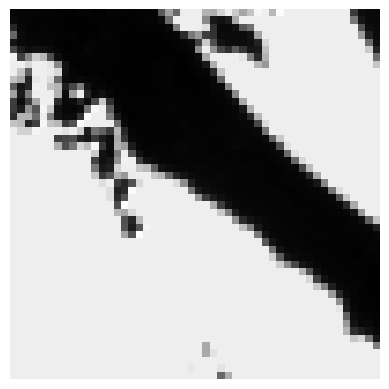

In [12]:
from openretina.plotting import play_stimulus

play_stimulus(torch.Tensor(train_video_baccus[:, :300]))

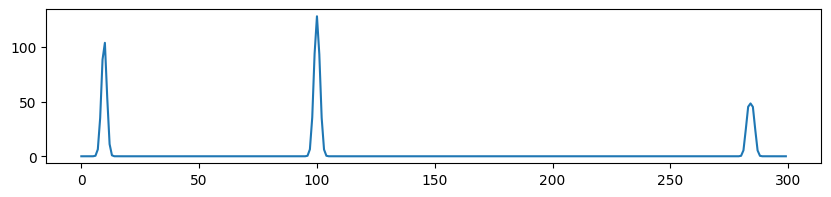

In [13]:
train_response_baccus = load_dataset_from_h5(baccus_data_example_path, "/train/response/firing_rate_10ms")
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
plt.plot(train_response_baccus[0, :300])